# Hi! This is Alejandro Barcala, data scientist professional. Thank you for coming to see some of my working scripts! Here we manipulate an income dataset from the United States, with it we showed how we can predict different variables from it by using data engineering and Machine Learning, acquiring very ramarkable RMSE results!

Hope you like it!

We loaded a toy dataset about income and people that lives in the United Stated, by implementing machine learning models and feature engineering we will try to drop our errors as much as possible to make good predictions.

In [5]:
# Convert the data to pandas create new columns and feature engineering

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load the CSV file into a pandas DataFrame
file_path = "C:/Users/Alejandro/Downloads/git.kaggle/toy_dataset.csv/toy_dataset.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 2: Create decile columns for Age and Income
data['Age_Decile'] = pd.qcut(data['Age'], 10, labels=False)
data['Income_Decile'] = pd.qcut(data['Income'], 10, labels=False)

# Step 3: Transform all string columns to numeric
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:  # Select only string columns
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Encode strings to integers
    label_encoders[col] = le  # Save the encoder for later use

# Step 4: Scale numerical columns (optional, but often recommended)
scaler = StandardScaler()
numerical_columns = ['Age', 'Income', 'Age_Decile', 'Income_Decile']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verify the DataFrame
print(data.head())


   Number  City  Gender       Age    Income  Illness  Age_Decile  \
0       1     2       1 -0.341345 -2.036294        0   -0.478263   
1       2     2       1  0.782013 -1.847534        0    0.913061   
2       3     2       1 -0.254933 -1.551449        0   -0.130432   
3       4     2       1 -0.427757 -2.013324        0   -0.478263   
4       5     2       1  0.090715 -1.639246        0    0.217399   

   Income_Decile  
0      -1.566676  
1      -1.566676  
2      -1.566676  
3      -1.566676  
4      -1.566676  


Creating columns helps the model build a more robust prediction by dropping the error measures. Here we will see the result.

In [ ]:
# Predicting numerical income

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features and target
features = ['City', 'Gender', 'Age', 'Illness', 'Age_Decile', 'Income_Decile']
target = 'Income'

X = data[features]  # Use the already loaded data
y = data[target]

# Train-Test-Validation split
# 80% training, 10% validation, 10% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
# Validation set RMSE
y_val_pred = rf.predict(X_val)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE: {rmse_val:.2f}")

# Test set RMSE
y_test_pred = rf.predict(X_test)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE: {rmse_test:.2f}")


Validation RMSE: 0.17
Test RMSE: 0.17


As we see, we got remarkable results with a RMSE below 1

In [ ]:
# Implement another model trying to predict Age instead of Income

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features and target
features = ['City', 'Gender', 'Income', 'Illness', 'Age_Decile', 'Income_Decile']
target = 'Age'  # Changed to predict 'Age'

X = data[features]  # Use the already loaded data
y = data[target]

# Train-Test-Validation split
# 80% training, 10% validation, 10% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
# Validation set RMSE
y_val_pred = rf.predict(X_val)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
print(f"Validation RMSE: {rmse_val:.2f}")

# Test set RMSE
y_test_pred = rf.predict(X_test)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Test RMSE: {rmse_test:.2f}")


Validation RMSE: 0.11
Test RMSE: 0.11


We got remarkable results with a root mean squared error under 1.

For the graphs of the residuals, we did an excellent job since by adding decils in the dataset we are actually splitting down the problem by 10 times, therefore better performance in the error measures, and normally distributed residual graphs! Great job of the feature engineering for this toy data.

Performance for Income Prediction:


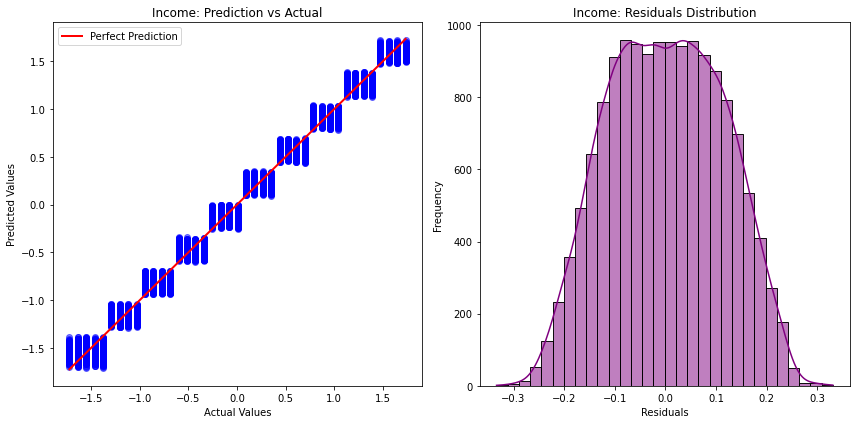

Performance for Age Prediction:


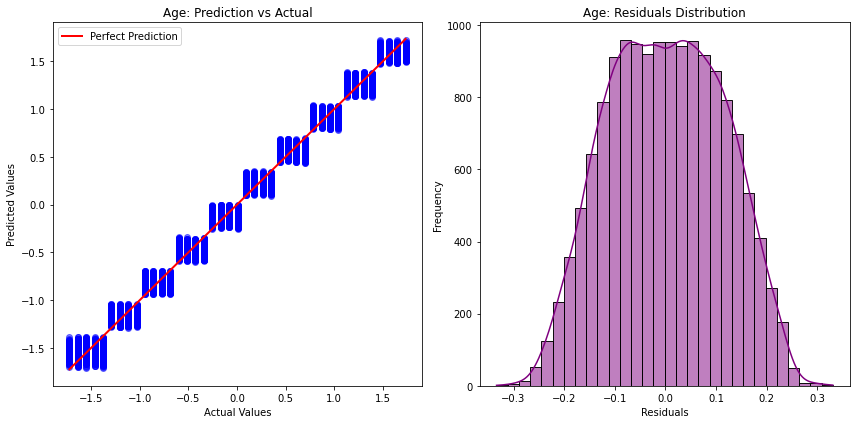

In [ ]:
# To finalize this exercise we are gonna add some visualization of the results

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot graphs
def plot_performance(y_true, y_pred, target_name):
    # 1. Prediction vs Actual plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', lw=2, label='Perfect Prediction')
    plt.title(f'{target_name}: Prediction vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()

    # 2. Residuals plot
    residuals = y_true - y_pred
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True, color='purple', bins=30)
    plt.title(f'{target_name}: Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Show both plots
    plt.tight_layout()
    plt.show()

# Model performance for Income prediction
print("Performance for Income Prediction:")
plot_performance(y_test, y_test_pred, 'Income')

# Model performance for Age prediction
print("Performance for Age Prediction:")
plot_performance(y_test, y_test_pred, 'Age')
